In [154]:
##### FONCTION DE NETTOYAGE #####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [155]:
## 1. Lire de fichier
def importation():
    df =  pd.read_csv("adult.csv", na_values='?')
    return df

df=importation()

In [156]:
## 2. Données manquantes 

# 2.1 Détection des données manquantes
def donnees_manquantes(data):
    missing_values_per_column = data.isnull().sum()
    return missing_values_per_column

donnees_manquantes(df)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [141]:
## 2.2 Traitement des données manquantes 

def traiter_donnees_manquantes(data):
    # Remplacez les valeurs manquantes par la valeur "no_info" pour les variables "workclass" et "occupation"
    data['workclass'].fillna("no_info", inplace=True)
    data['occupation'].fillna("no_info", inplace=True)

    # Remplacez les valeurs manquantes dans la colonne "native-country" par le mode
    mode_native_country = data['native-country'].mode()[0]
    data['native-country'].fillna(mode_native_country, inplace=True)

    return data

traiter_donnees_manquantes(df)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,no_info,103497,Some-college,10,Never-married,no_info,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


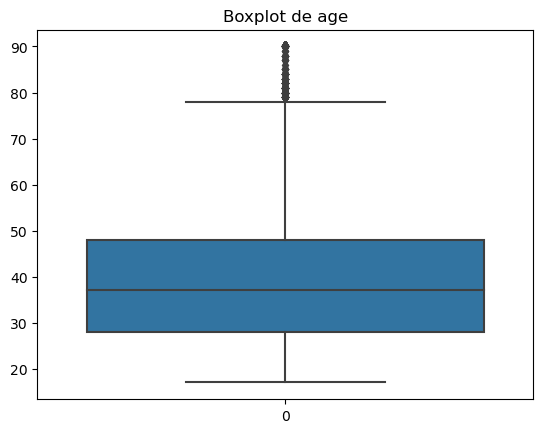

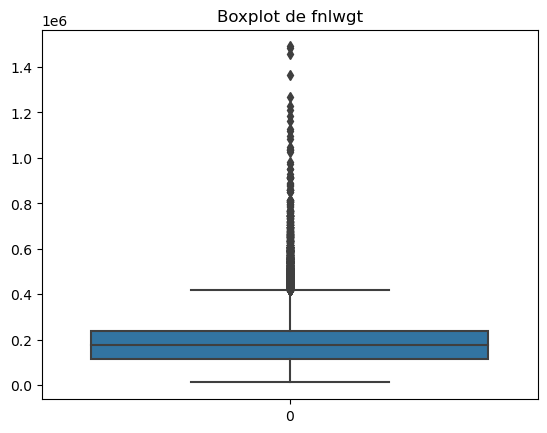

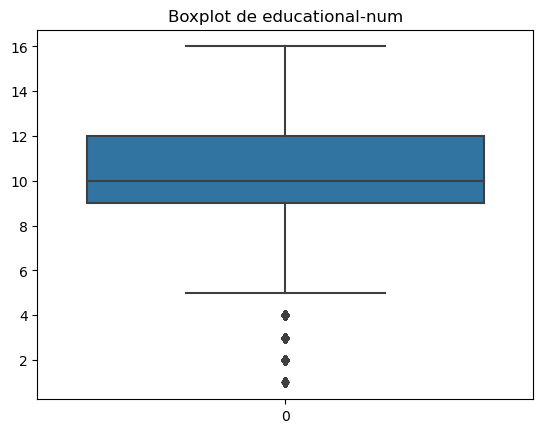

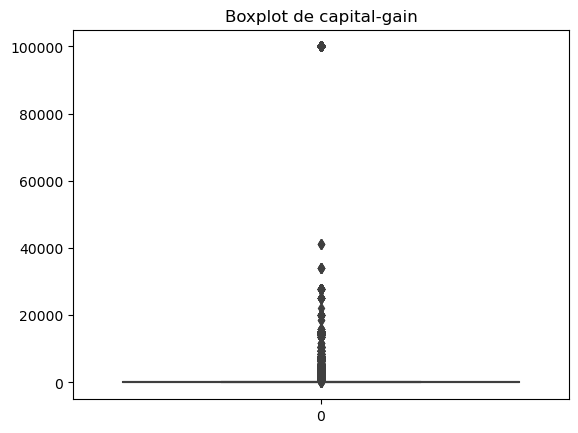

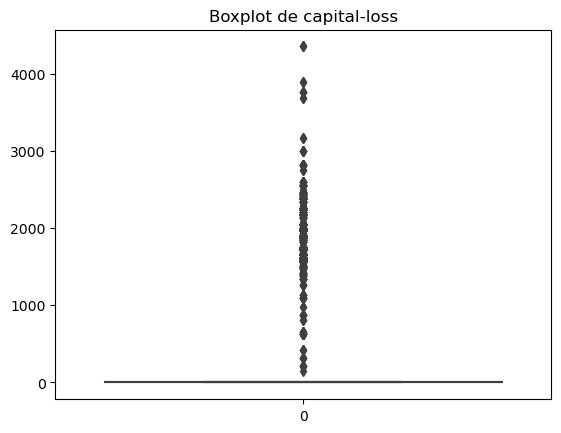

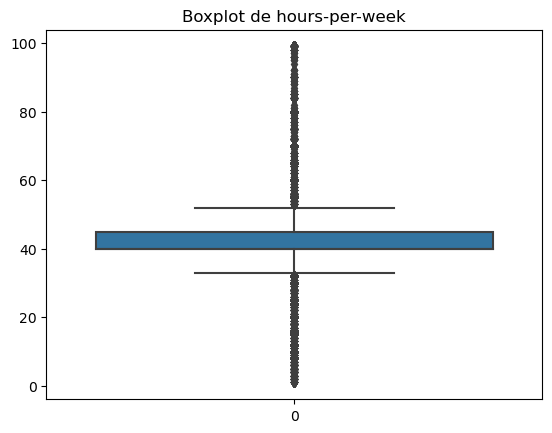

In [108]:
## 3. Détection des données aberrantes par boxplot pour les variables numériques

def detecter_donnees_aberrantes_par_boxplot(data):
    # Sélectionnez les colonnes numériques
    colonnes_numeriques = data.select_dtypes(include=['float64', 'int64'])

    # Tracez un boxplot pour chaque colonne numérique
    for colonne in colonnes_numeriques:
        plt.figure()  # Crée une nouvelle figure pour chaque boxplot
        sns.boxplot(data=data[colonne])
        plt.title(f'Boxplot de {colonne}')  # Utilisation du nom de la colonne comme titre
        plt.show()  # Affiche le boxplot

detecter_donnees_aberrantes_par_boxplot(df)

In [142]:
# 4. Regroupement des variables 

def regroupement(data):
    # 4.1 Variable 'age'
    def recoder_age(data):
        conditions = [
            (data['age'] <= 28),
            (data['age'] > 28) & (data['age'] <= 39),
            (data['age'] > 39) & (data['age'] <= 49),
            (data['age'] >= 50)
        ]

        choices = ['<=28 ans', '29_39 ans', '40_49 ans', '>=50 ans']

        data['Age'] = np.select(conditions, choices, default='')

        return data

    recoder_age(data)

    # 4.2 Variable 'hours-per-week'
    def recoder_heures_semaine(data):
        conditions_hours = [
            (data['hours-per-week'] <= 40),
            (data['hours-per-week'] > 40) & (data['hours-per-week'] <= 46),
            (data['hours-per-week'] > 46)
        ]

        choices_hours = ['<=40H', '40_46H', '>46H']

        data['Heures_semaine'] = np.select(conditions_hours, choices_hours, default='')

        return data

    recoder_heures_semaine(data)

    # 4.3 Variable 'native-country'
    def recoder_native_country(data):
        data['native-country'] = data['native-country'].str.strip()

        def group_countries(country):
            if country == 'United-States':
                return 'United_States'
            elif pd.notnull(country):
                return 'autres_pays'
            else:
                return country

        data['country_group'] = data['native-country'].apply(group_countries)

        return data 

    recoder_native_country(data)

    # 4.4 Variable 'workclass'
    def recoder_emploi_secteur(data):
        def emploi_secteur(workclass):
            if workclass in ('Federal-gov', 'Local-gov', 'State-gov'):
                return 'Gouvernement'
            elif workclass in ('Never-worked', 'Without-pay'):
                return 'Sans_emploi'
            else:
                return 'Prive'

        data['Emploi_Secteur'] = data['workclass'].apply(emploi_secteur)

        return data

    recoder_emploi_secteur(data)

    # 4.5 Variable 'marital-status'
    def recoder_marital_status(data):
        def recoder_status(status):
            if status in ('Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'):
                return 'Marie'
            elif status == 'Never-married':
                return 'Jamais_marie'
            else:
                return 'Ex_Marie'

        data['Marital_status'] = data['marital-status'].apply(recoder_status)

        return data

    recoder_marital_status(data)

    # 4.6 Variable 'education'
    def recoder_education(data):
        conditions_education = [
            data['education'].isin(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th']),
            data['education'].isin(['10th', '11th', '12th', 'HS-grad']),
            data['education'].isin(['Some-college', 'Assoc-acdm', 'Assoc-voc']),
        ]

        choices_education = ['Primaire_Second', 'Lycee', 'Sup']

        data['Education'] = np.select(conditions_education, choices_education, default='Sup_plus')

        return data

    recoder_education(data)

    # 4.7 Variable 'occupation'
    def recoder_occupation(data):
        conditions = [
            data['occupation'].isin(['Adm-clerical', 'Exec-managerial', 'Prof-specialty', 'Tech-support']),
            data['occupation'].isin(['Armed-Forces', 'Protective-serv']),
            data['occupation'].isin(['Craft-repair', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct']),
            data['occupation'].isin(['No_information', 'Other-service']),
            data['occupation'].isin(['Priv-house-serv', 'Sales']),
            data['occupation'] == 'Transport-moving'
        ]

        choices = ['Administration', 'Armee_defense', 'Artisan_Reparation', 'Autre_service', 'Ventes_Services', 'Transport']

        data['Occupation'] = np.select(conditions, choices, default='Autre')

        return data

    recoder_occupation(data)

    # 4.8 Variable 'relationship'
    def recoder_relationship(data):
        conditions_relationship = [
            (data['relationship'] == 'Husband') | (data['relationship'] == 'Wife')
        ]

        choices_relationship = ['Conjoint']

        data['Relationship'] = np.where(conditions_relationship[0], choices_relationship[0], 'Autre')

        return data

    recoder_relationship(data)

    return data

regroupement(df)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,native-country,income,Age,Heures_semaine,country_group,Emploi_Secteur,Marital_status,Education,Occupation,Relationship
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,United-States,<=50K,<=28 ans,<=40H,United_States,Prive,Jamais_marie,Lycee,Artisan_Reparation,Autre
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,United-States,<=50K,29_39 ans,>46H,United_States,Prive,Marie,Lycee,Artisan_Reparation,Conjoint
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,United-States,>50K,<=28 ans,<=40H,United_States,Gouvernement,Marie,Sup,Armee_defense,Conjoint
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,United-States,>50K,40_49 ans,<=40H,United_States,Prive,Marie,Sup,Artisan_Reparation,Conjoint
4,18,no_info,103497,Some-college,10,Never-married,no_info,Own-child,White,Female,...,United-States,<=50K,<=28 ans,<=40H,United_States,Prive,Jamais_marie,Sup,Autre,Autre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,United-States,<=50K,<=28 ans,<=40H,United_States,Prive,Marie,Sup,Administration,Conjoint
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,United-States,>50K,40_49 ans,<=40H,United_States,Prive,Marie,Lycee,Artisan_Reparation,Conjoint
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,United-States,<=50K,>=50 ans,<=40H,United_States,Prive,Ex_Marie,Lycee,Administration,Autre
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,United-States,<=50K,<=28 ans,<=40H,United_States,Prive,Jamais_marie,Lycee,Administration,Autre


In [144]:
# 5. Supprimer des colonnes qu'on a fait des regroupements

def supprimer_colonnes(data):
    # Colonnes à supprimer
    colonnes_a_supprimer = ['occupation', 'hours-per-week', 'relationship', 'native-country', 
                            'marital-status','education','age', 'workclass']

    # Suppression des colonnes spécifiées
    data.drop(columns=colonnes_a_supprimer, inplace=True)

    return data

supprimer_colonnes(df)

,fnlwgt,educational-num,race,gender,capital-gain,capital-loss,income,Age,Heures_semaine,country_group,Emploi_Secteur,Marital_status,Education,Occupation,Relationship
0,226802,7,Black,Male,0,0,<=50K,<=28 ans,<=40H,United_States,Prive,Jamais_marie,Lycee,Artisan_Reparation,Autre
1,89814,9,White,Male,0,0,<=50K,29_39 ans,>46H,United_States,Prive,Marie,Lycee,Artisan_Reparation,Conjoint
2,336951,12,White,Male,0,0,>50K,<=28 ans,<=40H,United_States,Gouvernement,Marie,Sup,Armee_defense,Conjoint
3,160323,10,Black,Male,7688,0,>50K,40_49 ans,<=40H,United_States,Prive,Marie,Sup,Artisan_Reparation,Conjoint
4,103497,10,White,Female,0,0,<=50K,<=28 ans,<=40H,United_States,Prive,Jamais_marie,Sup,Autre,Autre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,257302,12,White,Female,0,0,<=50K,<=28 ans,<=40H,United_States,Prive,Marie,Sup,Administration,Conjoint
48838,154374,9,White,Male,0,0,>50K,40_49 ans,<=40H,United_States,Prive,Marie,Lycee,Artisan_Reparation,Conjoint
48839,151910,9,White,Female,0,0,<=50K,>=50 ans,<=40H,United_States,Prive,Ex_Marie,Lycee,Administration,Autre
48840,201490,9,White,Male,0,0,<=50K,<=28 ans,<=40H,United_States,Prive,Jamais_marie,Lycee,Administration,Autre


In [145]:
# 6. Centre réduit les variables "capital-loss" et "capital-gain" en variable "capital"

def traitement_capital(data):
    # Création de la nouvelle colonne 'capital'
    data['capital'] = data['capital-gain'] - data['capital-loss']

    # Remplacement de la valeur 99999 par NaN
    data['capital'].replace(99999, np.nan, inplace=True)

    # Suppression des lignes avec des valeurs manquantes dans la colonne 'capital'
    data.dropna(subset=['capital'], inplace=True)

    # Standardisation de la colonne 'capital' avec StandardScaler
    scaler = StandardScaler()
    data_to_scale = data[['capital']]
    data['capital'] = scaler.fit_transform(data_to_scale)

    return data

traitement_capital(df)


,fnlwgt,educational-num,race,gender,capital-gain,capital-loss,income,Age,Heures_semaine,country_group,Emploi_Secteur,Marital_status,Education,Occupation,Relationship,capital
0,226802,7,Black,Male,0,0,<=50K,<=28 ans,<=40H,United_States,Prive,Jamais_marie,Lycee,Artisan_Reparation,Autre,-0.191029
1,89814,9,White,Male,0,0,<=50K,29_39 ans,>46H,United_States,Prive,Marie,Lycee,Artisan_Reparation,Conjoint,-0.191029
2,336951,12,White,Male,0,0,>50K,<=28 ans,<=40H,United_States,Gouvernement,Marie,Sup,Armee_defense,Conjoint,-0.191029
3,160323,10,Black,Male,7688,0,>50K,40_49 ans,<=40H,United_States,Prive,Marie,Sup,Artisan_Reparation,Conjoint,2.779084
4,103497,10,White,Female,0,0,<=50K,<=28 ans,<=40H,United_States,Prive,Jamais_marie,Sup,Autre,Autre,-0.191029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,257302,12,White,Female,0,0,<=50K,<=28 ans,<=40H,United_States,Prive,Marie,Sup,Administration,Conjoint,-0.191029
48838,154374,9,White,Male,0,0,>50K,40_49 ans,<=40H,United_States,Prive,Marie,Lycee,Artisan_Reparation,Conjoint,-0.191029
48839,151910,9,White,Female,0,0,<=50K,>=50 ans,<=40H,United_States,Prive,Ex_Marie,Lycee,Administration,Autre,-0.191029
48840,201490,9,White,Male,0,0,<=50K,<=28 ans,<=40H,United_States,Prive,Jamais_marie,Lycee,Administration,Autre,-0.191029


In [146]:
# 7. Supprimer certaines variables qu'on n'utilise pas pour une modélisation

def supprimer_colonnes_modelisation(data):
    # Colonnes à supprimer
    colonnes_a_supprimer = ['capital-gain', 'capital-loss', 'country_group', 'Emploi_Secteur', 'race', 'fnlwgt', 'educational-num']

    # Suppression des colonnes spécifiées
    data.drop(columns=colonnes_a_supprimer, inplace=True)

    return data

supprimer_colonnes_modelisation(df)


,gender,income,Age,Heures_semaine,Marital_status,Education,Occupation,Relationship,capital
0,Male,<=50K,<=28 ans,<=40H,Jamais_marie,Lycee,Artisan_Reparation,Autre,-0.191029
1,Male,<=50K,29_39 ans,>46H,Marie,Lycee,Artisan_Reparation,Conjoint,-0.191029
2,Male,>50K,<=28 ans,<=40H,Marie,Sup,Armee_defense,Conjoint,-0.191029
3,Male,>50K,40_49 ans,<=40H,Marie,Sup,Artisan_Reparation,Conjoint,2.779084
4,Female,<=50K,<=28 ans,<=40H,Jamais_marie,Sup,Autre,Autre,-0.191029
...,...,...,...,...,...,...,...,...,...
48837,Female,<=50K,<=28 ans,<=40H,Marie,Sup,Administration,Conjoint,-0.191029
48838,Male,>50K,40_49 ans,<=40H,Marie,Lycee,Artisan_Reparation,Conjoint,-0.191029
48839,Female,<=50K,>=50 ans,<=40H,Ex_Marie,Lycee,Administration,Autre,-0.191029
48840,Male,<=50K,<=28 ans,<=40H,Jamais_marie,Lycee,Administration,Autre,-0.191029


In [153]:
# Calculez le pourcentage par modalité
pourcentages = df['Relationship'].value_counts(normalize=True) * 100
pourcentages

Autre       55.037244
Conjoint    44.962756
Name: Relationship, dtype: float64